### Regressão linear com o modelo LinearRegressio do pacote de aprendizado de máquina do Python, scikit-learn,  e o dataset Boston

### (a) Carregue o conjunto de dados de Boston e exiba os dados com o método head()

In [1]:
import pandas as pd
Boston = pd.read_csv('Boston.csv')

In [2]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### (b) Faça gráficos de medv em função dos outros atributos. Identifique um atributo que parece ter relação linear com medv.

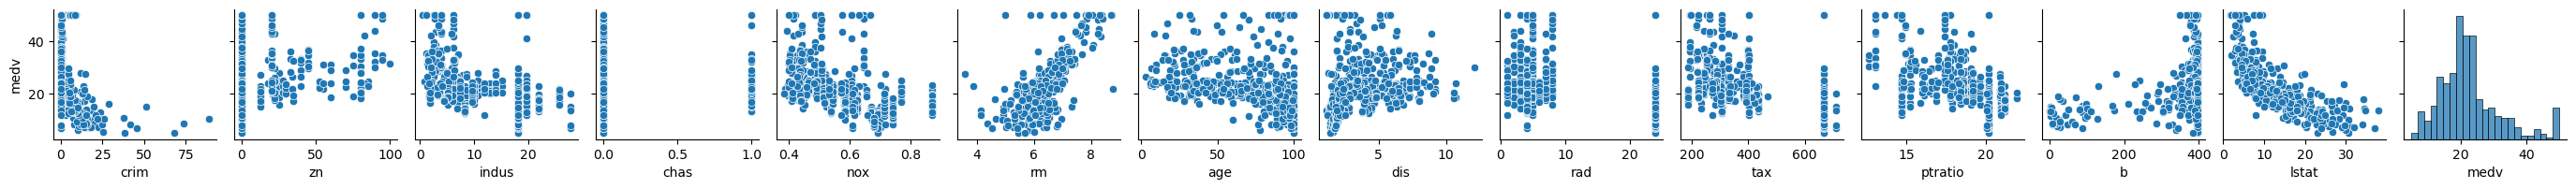

In [3]:
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

sns.pairplot(Boston, y_vars="medv", x_vars=Boston.columns.values, height=2);

### Se tiver ruim de enxergar, exiba as colunas do dataframe

In [4]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Parece que há uma **relação positiva linear** entre **medv** (valor médio da casa) e **rm** (número de cômodos)

### (c) Armazene o atributo com relação linear com medv em uma variável e o medv em outra variável. Quais os tipos e os shapes destas variáveis?

In [5]:
Xrm = Boston.rm
y = Boston.medv

In [6]:
type(Xrm), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [7]:
Xrm.shape, y.shape

((506,), (506,))

### (d) Crie e exiba um dataframe com as variáves do exercício anterior.

In [8]:
Boston_rm = pd.DataFrame({'medv':y, 'rm':Xrm})
Boston_rm

,medv,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


### (e) Importe e instancie a classe LinearRegression para obter a reta que melhor representa a relação entre medv e o atributo identificado no exercício (b)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
estimator = LinearRegression()

### (f) Use o método fit do objeto LinearRegression para treinar o estimador (treinar é encontrar a melhor reta). Faça o reshape necessário e verique os tipos das variáveis novamente. 

In [11]:
#estimator.fit(Xrm, y)
# erro:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array

In [12]:
# Xrm = Xrm.reshape(-1,1)
# y = y.reshape(-1,1)
# AttributeError: 'Series' object has no attribute 'reshape'

In [13]:
Xrm = Xrm.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [14]:
Xrm.shape, y.shape

((506, 1), (506, 1))

In [15]:
type(Xrm), type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
estimator.fit(Xrm, y)

LinearRegression()

### (g) Exiba os coeficientes da reta.

In [17]:
b = estimator.intercept_

In [18]:
a = estimator.coef_

In [19]:
a,b

(array([[9.10210898]]), array([-34.67062078]))

### (h) Use o método predict para obter os valores predito pelo modelo e exiba os valores preditos para os 5 primeiros dados. Compare com os 5 primeiros dados observados (dados reais, contidos no dataframe Boston).

In [20]:
y_pred = estimator.predict(Xrm)
y_pred[:5]

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211]])

In [21]:
Boston_rm[:5]

,medv,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147


### (i) Faça um gráfico do dataframe do exercício (d) juntamente com a reta obtida pelo modelo de Regressão Linear.

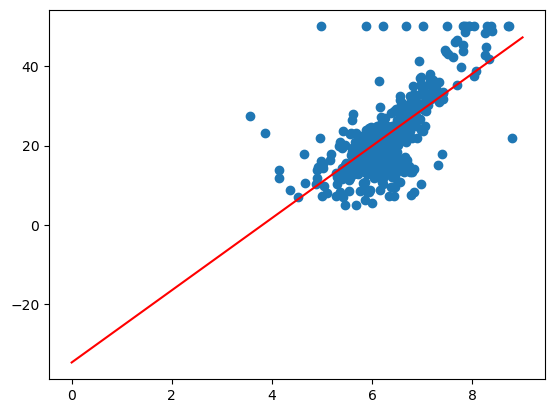

In [22]:
import numpy as np

x = np.linspace(0,9).reshape(-1,1)
plt.scatter(Xrm,y)
yp = a*x + b
plt.plot(x, yp, color = 'r');

### (j) Calcule o desempenho do modelo usando o método score.

In [23]:
estimator.score(Xrm.reshape(-1,1),y)

0.48352545599133423